# Assignment 1, Extragalactic Astronomy
Nasser Mohammed

Feburary 3rd, 2025

> The purpose of this question is to familiarize you with the basics of luminosity functions and with the relationship between the luminosity function, luminosity density, and mass density.
> Assume that galaxies can be described by a Schechter function luminosity function given in Table 4 of Loveday et al. 2015, MNRAS, 451, 2, 1540-1552.

## 1.1

> Write some code to compute the local number density of blue and red galaxies in the absolute magnitude range -23 < Mr < -14. Supply both the code and the answer. Any software or language is fine, though all things being equal I recommend a Jupyter notebook with Python for simplicity. In any case, I will zing you mercilessly if you don’t comment your notebook (or code file) appropriately to make it clear what you are doing.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

The Schecter function in units of number per magnitude interval is:

$$n(M) \ dM = 2/5 \ \phi_* \ln(10) \ [10^{0.4 (M_* - M)}]^{\alpha+1} \ \text{exp}[-10^{0.4(M_*-M)}]$$

To find the number per Mpc -3 for the provided magnitude interval we would integrate over it:

$$\int_{-23}^{-14} n(M) \ dM

In [17]:
h = 0.73 # dimensionless hubble constant 
MStar_blue = -20.36+5*np.log10(h) #from table 4
phiStar_blue = (10**(-2.27*(h**3))) #[Mpc^-3] --- from table 4
alpha_blue = -1.38 # from table 4

MStar_red = -20.68+5*np.log10(h) #from table 4
phiStar_red = (10**(-2.23*(h**3))) #[Mpc^-3] --- from table 4
alpha_red = -0.79 # from table 4


def schechter_mag(M, MStar, phiStar, alpha):
    """Schechter luminosity function"""
    logL = 0.4 * (MStar - M)
    return 2/5 * phiStar * np.log(10) * (10**logL)**(alpha+1) * np.exp(-10**logL)

In [27]:
dM = 0.0001
int_over = np.arange(-23, -14, dM)

n_MBlue = 0
for M in int_over:
    ## Approximating the integral as a summation
    n_MBlue += schechter_mag(M, MStar_blue, phiStar_blue, alpha_blue) * dM

print(f'{n_MBlue:.4} blue galaxies per Mpc³')
    
n_MRed = 0
for M in int_over:
    n_MRed += schechter_mag(M, MStar_red, phiStar_red, alpha_red) * dM

print(f'{n_MRed:.3} red galaxies per Mpc³')

3.559 blue galaxies per Mpc³
0.436 red galaxies per Mpc³


In [21]:
n_MBlue/n_MRed

np.float64(8.168539118519687)

Unclear what makes my calculation 'local' as the question asks for. 

# 1.2

>  Make a plot showing how the local luminosity density of red and blue galaxies changes as a function of faint-end slope α, exploring the range -2.0 < α < -0.5. You may assume the Schechter function applies over an infinite luminosity range. (Note: luminosity density should be plotted in units of solar luminosity per cubic Mpc)

I want to use equation 5 from Bob's mathematica notebook:

$$<L> = \int_0^{\infty} L_\phi(L) \ dL = \phi_* \ L_* \ \Gamma \ (\alpha + 2)$$

- First have to convert M* to L*


In [19]:
from astropy import units as u
LSun = 3.828e26 * u.W
LStar_blue = 10**((4.83-MStar_blue)/2.5) # [Solar Luminosities]
LStar_red =  10**((4.83-MStar_red)/2.5) # [Solar Luminosities]

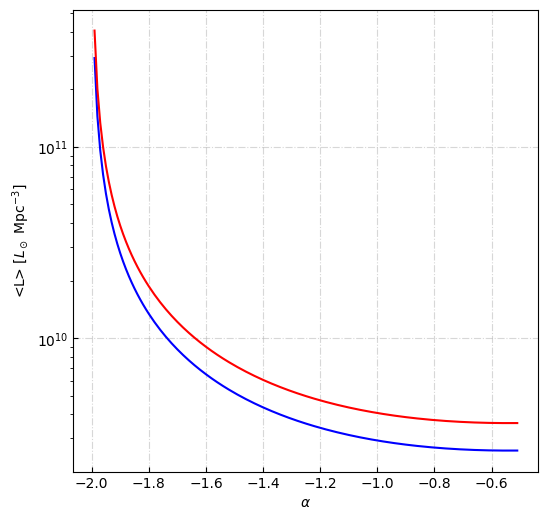

In [20]:
from scipy.special import gamma

alpha_range = np.arange(-2.0, -0.5, 0.01)

# Calculate luminosity density for blue and red galaxies
lum_density_blue = np.array([phiStar_blue * LStar_blue * gamma(alpha + 2) for alpha in alpha_range])
lum_density_red = np.array([phiStar_red * LStar_red * gamma(alpha + 2) for alpha in alpha_range])

plt.figure(figsize=(6, 6))
plt.plot(alpha_range, lum_density_blue, c='b')
plt.plot(alpha_range, lum_density_red, c='r')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'<L> [$L_\odot$ Mpc$^{-3}$]')
plt.tick_params(direction='in')
plt.yscale('log')
plt.grid(ls = '-.', alpha=0.5)


### 1.3
>  Assuming a g-band baryonic mass-to-light ratio of 10 for red galaxies, and 3 for blue galaxies, and assuming all baryons are in stars, what faint-end slope is needed for blue galaxies to contribute most of the galactic baryons in the Universe? For simplicity of calculation, you may assume the Schechter function applies over an infinite luminosity range

In [ ]:
# Integrate infinite magnitude limits
from tqdm import tqdm
dM = 0.001

n_MBlue_u = 0
for M in tqdm(np.arange(-100, 10, dM)):
    ## Approximating the integral as a summation
    n_MBlue_u += schechter_mag(M, MStar_blue, phiStar_blue, alpha_blue) * dM

print(f'{n_MBlue_u:.4} blue galaxies per Mpc³')
    
n_MRed_u = 0
for M in tqdm(np.arange(-100, 10, dM)):
    n_MRed_u += schechter_mag(M, MStar_red, phiStar_red, alpha_red) * dM

print(f'{n_MRed_u:.3} red galaxies per Mpc³')

100%|██████████| 110000/110000 [00:00<00:00, 698829.37it/s]


1.802e+04 blue galaxies per Mpc³


100%|██████████| 110000/110000 [00:00<00:00, 821365.71it/s]

0.59 red galaxies per Mpc³
